# Practice Homework #2

### 1. Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from mpl_toolkits.mplot3d import Axes3D
import math

### 2. Coding process

- Generate bivariate Normal distribution

In [2]:
# N((0,0), (1, 0.5; 0.5, 1))
data = np.random.multivariate_normal((0, 0), [[1, 0.5], [0.5, 1]], 50)
print('Multinorm shape : ', data.shape)
x = data[:, 0]    # x값을 첫번째 열로
y = data[:, 1]    # y값을 두번째 열로
xmin, xmax = -3, 3    # x 최소, 최대값 지정
ymin, ymax = -3, 3    # y 최소, 최대값 지정

Multinorm shape :  (50, 2)


- Generate the kernel density estimate

In [3]:
xx, yy = np.mgrid[xmin:xmax:5j, ymin:ymax:5j]    # grid 지정 : 최소값~최대값까지 5등분
positions = np.vstack([xx.ravel(), yy.ravel()])    # vstack()는 두 array를 아래로 쌓는 것/ ravel()는 짝 펴주는 메소드, 쫙 펼쳐서 펼친것을 아래로 쌓겠다는 의미
print('positions shape : ', positions.shape)
values = np.vstack([x, y])    # x, y를 아래로 쌓는다
print('values shape : ', values.shape)
kernel = st.gaussian_kde(values, bw_method=0.5)    # gaussian kernel 이용, bandwidth = 0.5
f = np.reshape(kernel(positions).T, xx.shape)    # kernel에 grid 값들을 대입한 뒤, shape 변형 5x5로

positions shape :  (2, 25)
values shape :  (2, 50)


> ☞ scipy의 경우 gaussian_kde만 존재 <br>
> ☞ 다른 kernel을 사용하고 싶다면 다른 package를 쓰거나 함수를 직접 만들어야 됨<br>
<br>
`
dir(st)
`

- 2D Density Estimate:Perspective Plot & Real Plot

In [4]:
Xg = np.arange(-3.0, 3.0, 0.1)
Yg = np.arange(-3.0, 3.0, 0.1)
X, Y = np.meshgrid(Xg, Yg)

v = (X**2 + Y**2 - 2 * 0.5 * X * Y) / (2.0 * (1.0 - 0.5**2))
v = np.exp(-v) / ((2.0 * math.pi * (1.0 - 0.5**2)) ** 0.5)

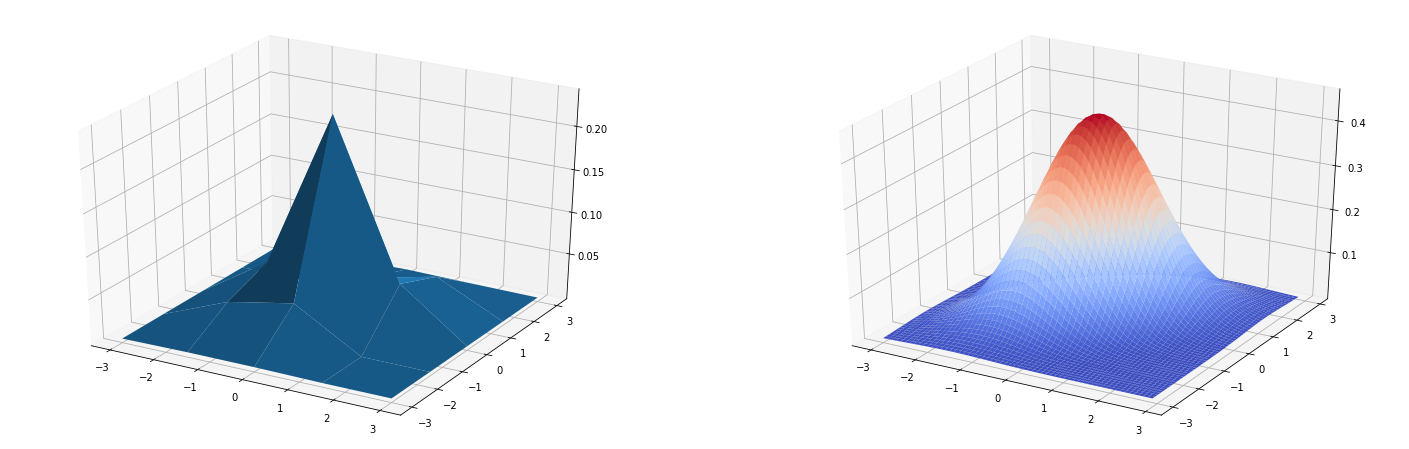

In [5]:
fig = plt.figure(figsize=(25,8))
ax1=fig.add_subplot(1, 2, 1, projection = '3d')
ax2=fig.add_subplot(1, 2, 2, projection = '3d')

ax1.plot_surface(xx, yy, f)
ax2.plot_surface(X, Y, v, rstride = 1, cstride = 1, cmap = plt.cm.coolwarm)
plt.show()

- - -

### 3. Bandwidth에 따른 변화

#### class를 이용한 간편 비교

In [6]:
class make_plot(object):
    def __init__(self, data, n, h, xmin, xmax, ymin, ymax, bw):
        self.data = data
        self.n = n
        self.h = h 
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax
        self.bw = bw
        
    def datasets(self):
        x = self.data[:, 0]
        y = self.data[:, 1]
        
        xx, yy = np.mgrid[self.xmin:self.xmax:self.h, self.ymin:self.ymax:self.h]
        positions = np.vstack([xx.ravel(), yy.ravel()])
        values = np.vstack([x, y])
        kernel = st.gaussian_kde(values, bw_method = self.bw)
        f = np.reshape(kernel(positions).T, xx.shape)
        
        return(xx, yy, f)
        
    def plots(self, xx, yy, f, h):    
        fig = plt.figure(figsize=(25,8))
        ax1=fig.add_subplot(1, 2, 1, projection = '3d')
        ax1.plot_surface(xx, yy, f)
        
        ax2=fig.add_subplot(1, 2, 2, projection = '3d')
        Xg = np.arange(-3.0, 3.0, h)
        Yg = np.arange(-3.0, 3.0, h)
        X, Y = np.meshgrid(Xg, Yg)

        v = (X**2 + Y**2 - 2 * 0.5 * X * Y) / (2.0 * (1.0 - 0.5**2))
        v = np.exp(-v) / ((2.0 * math.pi * (1.0 - 0.5**2)) ** 0.5)

        ax2.plot_surface(X, Y, v, rstride = 1, cstride = 1, cmap = plt.cm.coolwarm)
        plt.show()

#### kernel = gaussian, n = 200 , grid → x, y축 각각 20등분 , bandwidth = 0.3

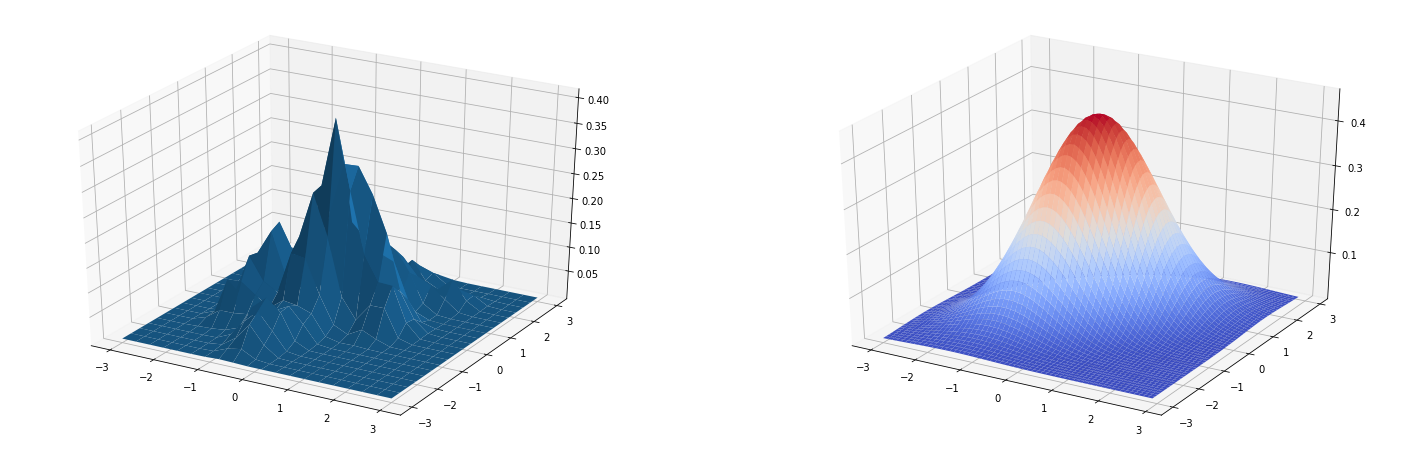

In [7]:
a = make_plot(data, 200, 20j, -3, 3, -3, 3, bw = 0.3) ; b = a.datasets()
a.plots(b[0],b[1],b[2], 0.1)

#### kernel = gaussian, n = 200 , grid → x, y축 각각 20등분 , bandwidth = 0.5

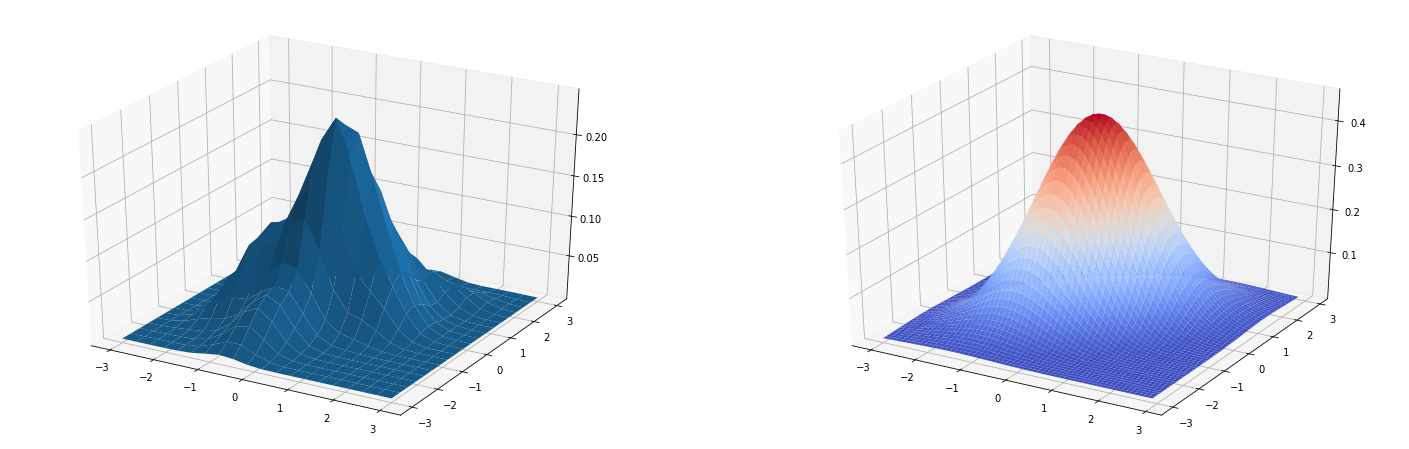

In [8]:
a = make_plot(data, 200, 20j, -3, 3, -3, 3, bw = 0.5) ; b = a.datasets()
a.plots(b[0],b[1],b[2], 0.1)

### 4. N에 따른 변화

#### kernel = gaussian, n = 50 , grid → x, y축 각각 20등분 , bandwidth = 0.5

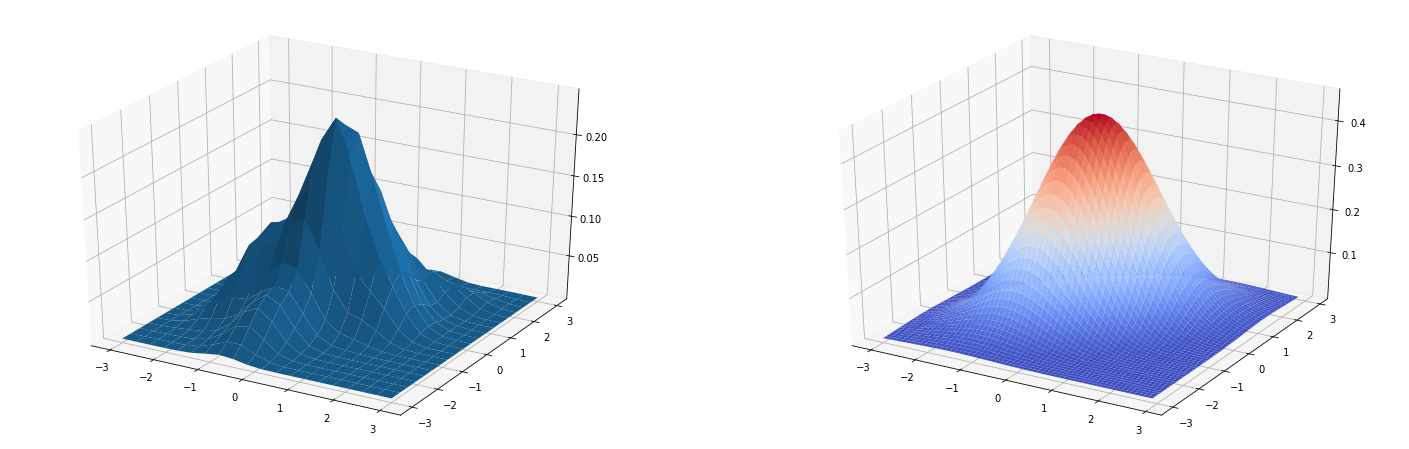

In [9]:
a = make_plot(data, 50, 20j, -3, 3, -3, 3, bw = 0.5) ; b = a.datasets()
a.plots(b[0],b[1],b[2], 0.1)

#### kernel = gaussian, n = 500 , grid → x, y축 각각 20등분 , bandwidth = 0.5

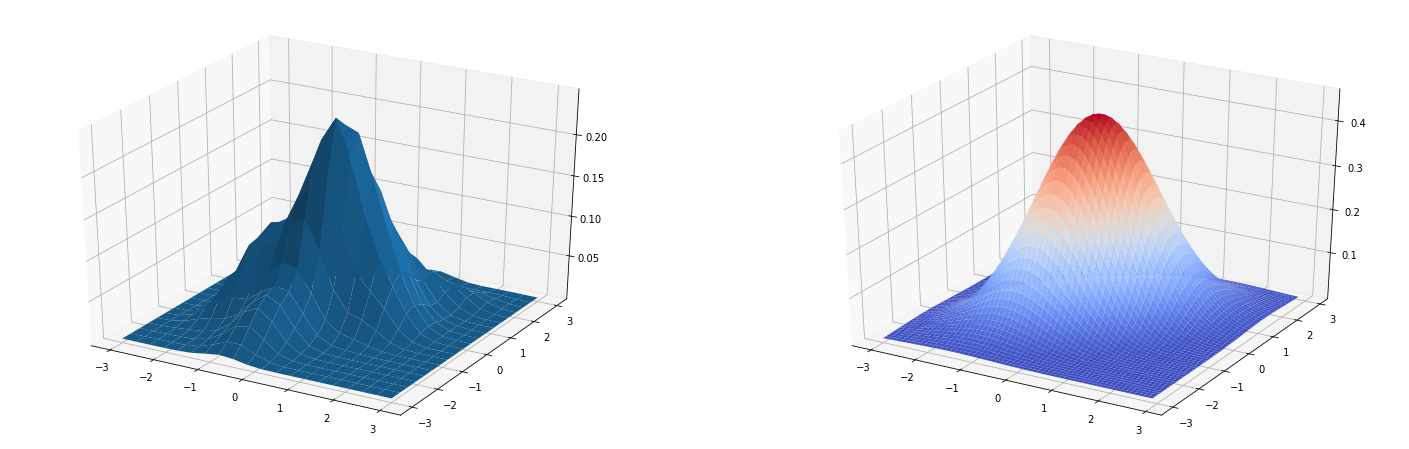

In [10]:
a = make_plot(data, 500, 20j, -3, 3, -3, 3, bw = 0.5) ; b = a.datasets()
a.plots(b[0],b[1],b[2], 0.1)

#### 결론
- 영향을 많이 받는 요소
> ☞ bandwidth > n
- Python을 이용한 여러가지 kernel types은 수정 방법 Search 필요
> ☞ from sklearn.neighbors import KernelDensity <br> 이용하면 가능

### 5. Real data

- Data load & Search

In [11]:
from sklearn.datasets import load_iris
import pandas as pd

In [12]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Kernel density estimator

- sepal length & sepal width 비교

In [14]:
df_iris = df[['sepal length (cm)', 'sepal width (cm)']].values
x = np.array(df['sepal length (cm)']); y = np.array(df['sepal width (cm)'])
xmin, xmax = min(x)-0.5, max(x)
ymin, ymax = min(y)-0.2, max(y)

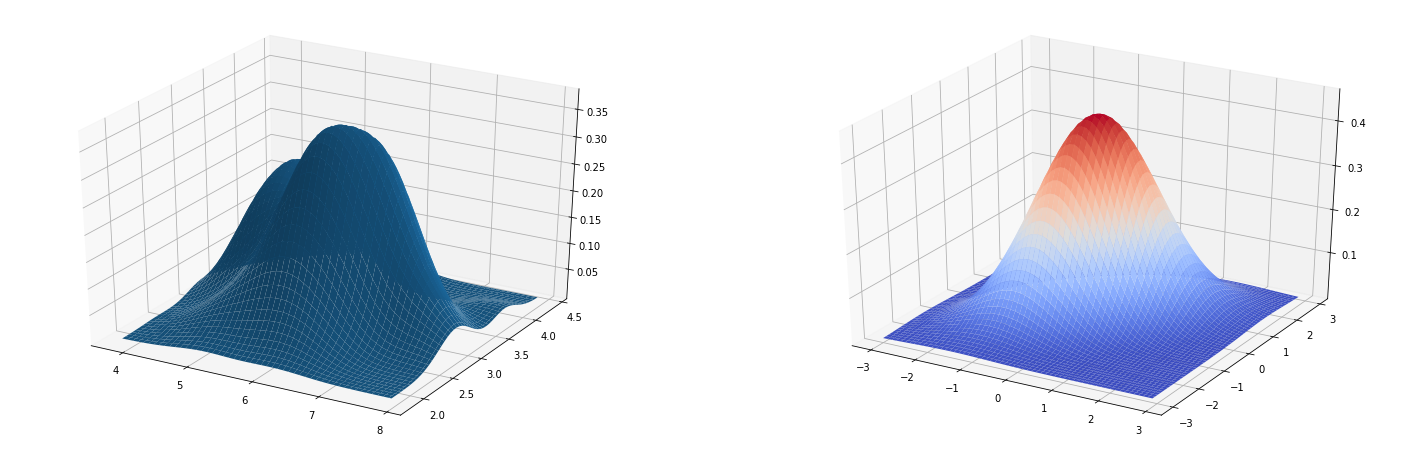

In [15]:
a = make_plot(df_iris, 200, 100j, xmin, xmax, ymin, ymax, bw = 0.5) ; b = a.datasets()
a.plots(b[0],b[1],b[2], 0.1)

In [16]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

- - -